Using simulated data (MC), we can generate with computers as many events of a particular decay as we like. Looking at LHC data, only a small fraction of events decay Z bosons and even a smaller fraction still decay to the Higgs boson. So when we look at real LHC events we will see that only a small fraction produce Z bosons. Running over the data file below we see only a small fraction of events pass our conditions for 2 Z boson. 

Iteration reached event number is 0
Iteration reached event number is 10
Iteration reached event number is 20
Iteration reached event number is 30


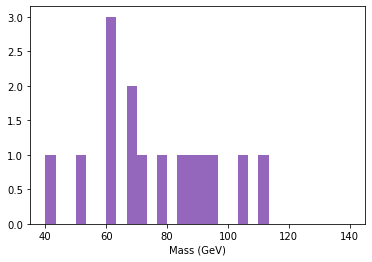

In [1]:
import uproot
import numpy as np
from TLorentzVector import TLorentzVector
import matplotlib.pyplot as plt
import hist
from hist import Hist


#Set up a counter when iteratring over events
counter = 0
outputEvery = 10

f_4l = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_A.4lep.root:mini")
#f_4l.show()

hist_Zl4 = Hist(hist.axis.Regular(30, 40, 140, label = "Mass (GeV)"))

firstLepton  = TLorentzVector()
secondLepton = TLorentzVector()
thirdLepton = TLorentzVector()
fourthLepton = TLorentzVector()

sel_events = f_4l.arrays(["lep_pt", "lep_eta", "lep_phi", "lep_E", "lep_charge", "lep_type", "lep_n"])

for event in sel_events:
    
    if ((counter % outputEvery) == 0):
        print('Iteration reached event number is {}'.format(counter))
        
        
    # Cut #1: At least 4 leptons in the event. lep_n  is the number of them.
    lep_n = event["lep_n"]
    if lep_n >= 4:
        # Cut #2: First two leptons must have opposite charge.
        lep_charge = event["lep_charge"]
        if (lep_charge[0] != lep_charge[1]):
            # Cut #3: First two leptons must have same flavour
            lep_type = event["lep_type"]
            if (lep_type[0] == lep_type[1]):
                
                lep_pt = event["lep_pt"]
                lep_eta = event["lep_eta"]
                lep_phi = event["lep_phi"]
                lep_E = event["lep_E"]
                
                firstLepton.SetPtEtaPhiE(lep_pt[0]/1000., lep_eta[0], lep_phi[0], lep_E[0]/1000.)
                secondLepton.SetPtEtaPhiE(lep_pt[1]/1000., lep_eta[1], lep_phi[1], lep_E[1]/1000.)
                # Cut #4: Second two leptons opposite charge
                if (lep_charge[2] != lep_charge[3]):
                    # Cut #5:
                    if ( lep_type[2] == lep_type[3]):
                        
                        thirdLepton.SetPtEtaPhiE(lep_pt[2]/1000., lep_eta[2], lep_phi[2], lep_E[2]/1000.)
                        fourthLepton.SetPtEtaPhiE(lep_pt[3]/1000., lep_eta[3], lep_phi[3], lep_E[3]/1000.)
                        
                        Z0_boson1 = firstLepton + secondLepton
                        Z0_boson2 = thirdLepton + fourthLepton
                        
                        hist_Zl4.fill(Z0_boson1.M())
                        hist_Zl4.fill(Z0_boson2.M())
                        hist_Zl4.plot(histtype = "fill")
                        
        counter+=1
                        
                        #plt.show()

/home/olaiya/anaconda3/envs/dev/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f50a42ed690>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

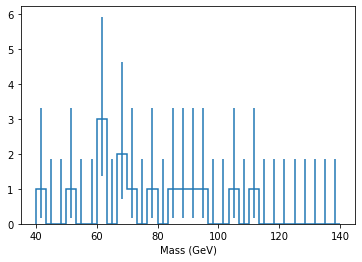

In [2]:
hist_Zl4.plot()

Running over this file works! However we see we don't have many data events. Let's run over more events!

Opened file https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_A.4lep.root:mini
Iteration reached event number is 0
Iteration reached event number is 10
Iteration reached event number is 20
Iteration reached event number is 30
Opened file https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_B.4lep.root:mini
Iteration reached event number is 40
Iteration reached event number is 50
Iteration reached event number is 60
Iteration reached event number is 70
Iteration reached event number is 80
Iteration reached event number is 90
Iteration reached event number is 100
Iteration reached event number is 110
Iteration reached event number is 120
Iteration reached event number is 130
Iteration reached event number is 140
Iteration reached event number is 150
Iteration reached event number is 160
Iteration reached event number is 170
Iteration reached event number is 180
Iteration reached event number is 190
Opened file https://atlas-opendata.we

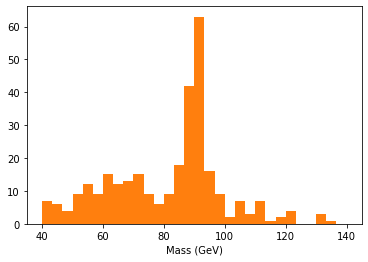

In [3]:
#Declare a new histogram
hist_Zl4_data = Hist(hist.axis.Regular(30, 40, 140, label = "Mass (GeV)"))

#Set up a counter when iteratring over events
counter = 0
outputEvery = 10

#List all the files we want to run over
dataA = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_A.4lep.root:mini"
dataB = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_B.4lep.root:mini"
dataC = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_C.4lep.root:mini"
dataD = "https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/4lep/Data/data_D.4lep.root:mini"

dataList = [dataA, dataB, dataC, dataD]

for dataFile in dataList:

    f_4l = uproot.open(dataFile)
    print('Opened file '+dataFile)
    
    firstLepton  = TLorentzVector()
    secondLepton = TLorentzVector()
    thirdLepton = TLorentzVector()
    fourthLepton = TLorentzVector()

    sel_events = f_4l.arrays(["lep_pt", "lep_eta", "lep_phi", "lep_E", "lep_charge", "lep_type", "lep_n"])

    for event in sel_events:

        if ((counter % outputEvery) == 0):
            print('Iteration reached event number is {}'.format(counter))


        # Cut #1: At least 4 leptons in the event. lep_n  is the number of them.
        lep_n = event["lep_n"]
        if lep_n >= 4:
            # Cut #2: First two leptons must have opposite charge.
            lep_charge = event["lep_charge"]
            if (lep_charge[0] != lep_charge[1]):
                # Cut #3: First two leptons must have same flavour
                lep_type = event["lep_type"]
                if (lep_type[0] == lep_type[1]):

                    lep_pt = event["lep_pt"]
                    lep_eta = event["lep_eta"]
                    lep_phi = event["lep_phi"]
                    lep_E = event["lep_E"]

                    firstLepton.SetPtEtaPhiE(lep_pt[0]/1000., lep_eta[0], lep_phi[0], lep_E[0]/1000.)
                    secondLepton.SetPtEtaPhiE(lep_pt[1]/1000., lep_eta[1], lep_phi[1], lep_E[1]/1000.)
                    # Cut #4: Second two leptons opposite charge
                    if (lep_charge[2] != lep_charge[3]):
                        # Cut #5:
                        if ( lep_type[2] == lep_type[3]):

                            thirdLepton.SetPtEtaPhiE(lep_pt[2]/1000., lep_eta[2], lep_phi[2], lep_E[2]/1000.)
                            fourthLepton.SetPtEtaPhiE(lep_pt[3]/1000., lep_eta[3], lep_phi[3], lep_E[3]/1000.)

                            Z0_boson1 = firstLepton + secondLepton
                            Z0_boson2 = thirdLepton + fourthLepton

                            hist_Zl4_data.fill(Z0_boson1.M())
                            hist_Zl4_data.fill(Z0_boson2.M())
                            hist_Zl4_data.plot(histtype = "fill")

            counter+=1
                        
                        #plt.show()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f506bf6e1d0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

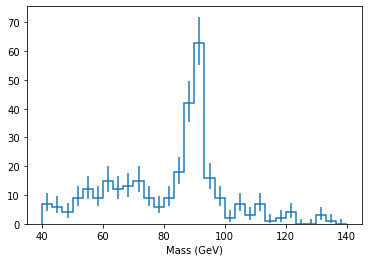

In [4]:
hist_Zl4_data.plot()

We can now see the Z peak in real data!